In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

"""
Loading the data
"""
pd.options.display.max_colwidth = 1500
pd.options.display.max_rows = 1000

df = pd.read_csv(r'books_and_genres.csv')

# drop the extra index column
df = df.drop(columns=df.columns[0])

df.head()

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders\n\n\n\n\n SENECA\n\n APOCOLOCYNTOSIS\n\n WITH AN ENGLISH TRANSLATION BY\n\n W.H.D. ROUSE, M.A. LITT. D.\n\n MCMXX\n\n\n\n\n\nINTRODUCTION\n\nThis piece is ascribed to Seneca by ancient tradition; it is impossible\nto prove that it is his, and impossible to prove that it is not. The\nmatter will probably continue to be decided by every one according to his\nview of Seneca's character and abilities: in the matters of style and of\nsentiment much may be said on both sides. Dion Cassius (lx, 35) says that\nSeneca composed an [Greek: apokolokuntosis] or Pumpkinification of\nClaudius after his death, the title being a parody of the usual\n[Greek: apotheosis]; but this title is not given in the MSS. of the Ludus\nde Morte Claudii, nor is there anything in the piece which suits the title\nvery well.\n\nAs a literary form, the piece belongs to the class called\n_Satura Menippea_, a satiric medley in prose and verse.\n\nThis text is that of Buecheler, with a few trifling changes, which are\nindicated in the notes. We have been courteously allowed by Messrs\nWeidmann to use this text. I have to acknowledge the help of Mr Ball's\nnotes, from which I have taken a few references; but my translation was\nmade many years ago.\n\nW.H.D. ROUSE.\n\n\n\n\n\nBIBLIOGRAPHY\n\n_Editio Princeps:_ Lucii Annaei Senecae in morte\n Claudii Caesaris Lud...","{'21st-century', 'history', 'roman', 'classics', 'religion', 'novels', 'philosophy', 'fiction', 'literature', 'short-stories', 'politics', 'non-fiction', 'read-for-school', 'poetry', 'historical', 'humor'}"
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders\n\n\n\n\nTHE HOUSE ON THE BORDERLAND\n\nWilliam Hope Hodgson\n\n\n_From the Manuscript discovered in 1877 by Messrs. Tonnison and\nBerreggnog in the Ruins that lie to the South of the Village of\nKraighten, in the West of Ireland. Set out here, with Notes_.\n\n\nTO MY FATHER\n_(Whose feet tread the lost aeons)_\n\nOpen the door,\n And listen!\nOnly the wind's muffled roar,\n And the glisten\nOf tears 'round the moon.\n And, in fancy, the tread\nOf vanishing shoon--\n Out in the night with the Dead.\n\n""Hush! And hark\n To the sorrowful cry\nOf the wind in the dark.\n Hush and hark, without murmur or sigh,\n To shoon that tread the lost aeons:\n To the sound that bids you to die.\nHush and hark! Hush and Hark!""\n _Shoon of the Dead_\n\n\n\n\nAUTHOR'S INTRODUCTION TO THE MANUSCRIPT\n\nMany are the hours in which I have pondered upon the story that is set\nforth in the following pages. I trust that my instincts are not awry\nwhen they prompt me to leave the account, in simplicity, as it was\nhanded to me.\n\nAnd the MS. itself--You must picture me, when first it was given into my\ncare, turning it over, curiously, and making a swift, jerky examination.\nA small book it is; but thick, and all, save the last few pages, filled\nwith a quaint but legible handwriting, and writ very close. I have the\nqueer, faint, pit-water smell of it in my nostrils now as I write, and\nmy f...","{'horror', 'mystery', 'classics', 'science-fiction', 'fantasy', 'novels', 'literature', 'fiction', 'paranormal', '20th-century', 'adult', 'speculative-fiction', 'supernatural', 'dark'}"
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner\nand the Online Distributed Proofreading Team.\n\n\n\n\nTHE WARRIORS\n\nBY ANNA ROBERTSON BROWN LINDSAY PH.D.\n\nAUTHOR OF\n\nWHAT IS WORTH WHILE?\nCULTURE AND REFORM\nTHE VICTORY OF OUR FAITH\n\n\n\n\nPREFACE\n\nThis work was begun nearly five years ago. Since then, the whole face of\nAmerican history has changed. We have had the Spanish-American War, and\nthe opening-up of our new possessions. In this period of time Gladstone,\nLi Hung Chang, and Queen Victoria have died; there has also occurred the\nassassination of the Empress of Austria and of President McKinley. There\nhas bee

In [4]:
"""
Basic formatting
"""
# stringify all text
df['text'] = df['text'].map(str)
df = df.replace({r'\r\n|\r|\n': ' '}, regex=True)

df.head(5)

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...","{'21st-century', 'history', 'roman', 'classics', 'religion', 'novels', 'philosophy', 'fiction', 'literature', 'short-stories', 'politics', 'non-fiction', 'read-for-school', 'poetry', 'historical', 'humor'}"
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...","{'horror', 'mystery', 'classics', 'science-fiction', 'fantasy', 'novels', 'literature', 'fiction', 'paranormal', '20th-century', 'adult', 'speculative-fiction', 'supernatural', 'dark'}"
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner and the Online Distributed Proofreading Team. THE WARRIORS BY ANNA ROBERTSON BROWN LINDSAY PH.D. AUTHOR OF WHAT IS WORTH WHILE? CULTURE AND REFORM THE VICTORY OF OUR FAITH PREFACE This work was begun nearly five years ago. Since then, the whole face of American history has changed. We have had the Spanish-American War, and the opening-up of our new possessions. In this period of time Gladstone, Li Hung Chang, and Queen Victoria have died; there has also occurred the assassination of the Empress of Austria and of President McKinley. There has been the Chinese persecution, the destruction of Galveston by storm and of Martinique by volcanic 

In [5]:
"""
Methods that will be used in the next block to try to source a published date
"""
import re
import roman;
from roman import InvalidRomanNumeralError

# regex for finding Gregorian or Roman publish dates
rn_year_regex = r'\b(.[M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3}))]{3,})\b'
modern_year_regex = r'(\b\d{4}\b)'
valid_year_regex = f'{modern_year_regex}|{rn_year_regex}'

# methods for finding above regex matches in text
find_year = re.compile('('+rn_year_regex+'|'+modern_year_regex+')');
find_modern_year = re.compile('('+modern_year_regex+')')

def is_right_era(int_date):
    return 1000 < int_date < 1922

def get_valid_date(date):
    try:
        int_date = int(date)
    except (ValueError, TypeError):
        return 0
    
    if is_right_era(int_date):
        return int_date
    
    return 0

def convert_date(date):
    if date == 'no date':
        return 0
    
    valid_date = get_valid_date(date)
    if valid_date:
        return valid_date
    
    try:
        number = roman.fromRoman(date.strip())
    except (InvalidRomanNumeralError, TypeError, AttributeError) as e:
        return 0
    
    valid_date = get_valid_date(number)
    return int(number)




In [6]:
"""
Try to source a published date from the intro text of each book and write to new "year" column
"""

# try to find either a Roman or Gregorian year within the text of each book, and insert into the "year" column
df['year'] = df['text'].map(lambda t: (find_year.search( t[0:1000]) or ["no date"])[0])

# no date before
print(len(df.loc[df['year'] == 'no date']))
df['year'] = df['year'].map(convert_date)

# no date after :(
print(len(df.loc[df['year'] == 0]))


3721
4797


In [7]:
"""
Methods that will be used in the next block to try to source published date from Google Books
"""

import requests
import time

# ADD YOUR GOOGLE BOOKS API CLIENT SECRET HERE IF YOU WOULD LIKE TO RUN THIS PORTION
secret = ''

def is_valid_date(date):
    try:
        int_date = int(date)
    except ValueError:
        return False
    return is_right_era(int_date)

def find_publication_year_from_item(item):
    published_date = item['volumeInfo'].get('publishedDate', '')
    if published_date and is_valid_date(published_date):
        return published_date
    
    # if there is no valid publishedDate, search in the description text of the response
    description = item['volumeInfo'].get('description', '')
    possible_dates = [date[0] for date in find_modern_year.findall(description) if is_valid_date(date[0])]
    if possible_dates:
        return min(possible_dates)

# check the Google Books API by a book's title in order to get the publication year
def get_publication_year(title):
    if not secret:
        print('Please assign value to "secret" variable above with your Google Books API key')
        return
    
    # avoid per-minute rate limiting
    time.sleep(0.05)
    url = f'https://www.googleapis.com/books/v1/volumes?q={title}&key={secret}'
    response = requests.get(url)
    
    try:
        items = response.json()['items']
    except KeyError as e:
        print('No matches found for ', title, response.json())
        return 0
    
    possible_years = [found for item in items if (found := find_publication_year_from_item(item)) is not None]
    if possible_years:
        year = min(possible_years)
        print(f'{title}: {year}')
        return year
    
    print('could not find year for title ', title)
    return 0


In [74]:
"""
Loop over the rows missing a publication year and run the above methods to attempt to fill it.
This needs to be done in batches because of rate limiting.

CSV with saved results imported in file in leui of live fetching. See commented out block below
if you would like to test it (you will need a Google Book API client key)
"""

# If you would like to test this out, uncomment the block below and use your own secret key in the block above
# dfcopy = df.copy()[0:100]
# dfcopy.loc[dfcopy['year'] == 0, 'year'] = dfcopy.loc[dfcopy['year'] == 0]['title'].apply(get_publication_year)

# read from the already compiled set instead of fetching live from Google Books API
dfFull = pd.read_csv('fullset.csv')

# Extra formatting!
# Force the year into an int and the text into a string
dfFull.year = dfFull.year.astype('int')
dfFull['text'] = dfFull['text'].astype(str)

# Drop the "genres" column as we will not use it
dfFull = dfFull.drop("genres", axis=1)
dfFull.head(3)

,title,text,year
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...",1920
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...",1877
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner and the Online Distributed Proofreading Team. THE WARRIORS BY ANNA ROBERTSON BROWN LINDSAY PH.D. AUTHOR OF WHAT IS WORTH WHILE? CULTURE AND REFORM THE VICTORY OF OUR FAITH PREFACE This work was begun nearly five years ago. Since then, the whole face of American history has changed. We have had the Spanish-American War, and the opening-up of our new possessions. In this period of time Gladstone, Li Hung Chang, and Queen Victoria have died; there has also occurred the assassination of the Empress of Austria and of President McKinley. There has been the Chinese persecution, the destruction of Galveston by storm and of Martinique by volcanic action. Wireless telegraphy has been discovered, and the source of the spread of certain fevers. In this time have been carried on gigantic engineering undertakings,--the Trans-Siberian Railroad, the Trans-Balkan Railroad, the rebuilding of New York. We have also looked upon the consolidation of vast forces of steel, iron, sugar, shipping, and other trusts. We have witnessed an extrao

In [75]:
"""
Helper method to determine whether a certain book has adequately long text
"""
MIN_FULL_TEXT = 15000
def is_acceptable_length(text, length=MIN_FULL_TEXT):
    if type(text) != str:
        return False
    if len(text) < length:
        return False


In [76]:
print('Book count before removing undated and outliers: ', len(dfFull))

print('Number of books without dates to be removed: ', len(dfFull.loc[dfFull.year == 0]))
dfFull = dfFull.drop(dfFull[dfFull.year== 0].index)

# drop the books from before 1775 - not enough examples
print('Number of books from before 1775, to be removed: ', len(dfFull.loc[dfFull.year<1775]))
dfFull = dfFull.drop(dfFull[dfFull.year < 1775].index)

# drop books after 1922 - these are errors
print('Number of books from after 1922, to be removed: ', len(dfFull.loc[dfFull.year>1922]))
dfFull = dfFull.drop(dfFull[dfFull.year > 1922].index)

# drop any books without text or not enough text
print('Number of books with too short or absent text, to be removed: ', len(dfFull[dfFull.text.apply(is_acceptable_length) == False]))
dfFull = dfFull.drop(dfFull[dfFull.text.apply(is_acceptable_length) == False].index)

print('Dropping duplicates')
dfFull = dfFull.drop_duplicates(subset='title', keep='first')

print('New book count: ', len(dfFull))

dfFull.head()

Book count before removing undated and outliers:  10633
Number of books without dates to be removed:  946
Number of books from before 1775, to be removed:  975
Number of books from after 1922, to be removed:  143
Number of books with too short or absent text, to be removed:  460
Dropping duplicates
New book count:  7279


,title,text,year
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...",1920
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...",1877
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad, Suzanne L. Shell and PG Distributed Proofreaders A VOYAGE TO THE MOON: WITH SOME ACCOUNT OF THE MANNERS AND CUSTOMS, SCIENCE AND PHILOSOPHY, OF THE PEOPLE OF MOROSOFIA, AND OTHER LUNARIANS. BY GEORGE TUCKER (JOSEPH ATTERLEY) ""It is the very error of the moon, She comes more near the earth than she was wont, And makes men mad.""--_Othello_. 1827 CONTENTS. CHAPTER I. Atterley's birth and education--He makes a voyage-- Founders off the Burman coast--Adventures in that Empire--Meets with a learned Brahmin from Benares. CHAPTER II. The Brahmin's illness--He reveals an important secret to Atterley--Curious information concerning the Moon--The Glonglims--They plan a voyage to the Moon. CHAPTER III. The Brahmin and Atterley prepare for their voyage-- Description of their travelling machine--Incidents of the voyage--The appearance of the earth; Africa; Greece--The Brahmin's speculations on the different races of men--National character. CHAPTER IV. Continuation of the voyage--View of Europe; Atlantic Ocean; America--Sp

Histogram of the distribution of publication year. Data is heavily skewed towards the later years of the set. The first 75 years of the dataset contains only ~1/3 of the total amount of books, while the last 72 years of the date range of the set contains 2/3rds of the total books. A full 45% of the books are from 1900-1922.

Between 1775-1850 books: 32%
Between 1850-1900 books:23%
Between 1900-1922 books: 45%


Text(0.5, 1.05, 'Distribution of books across year published')

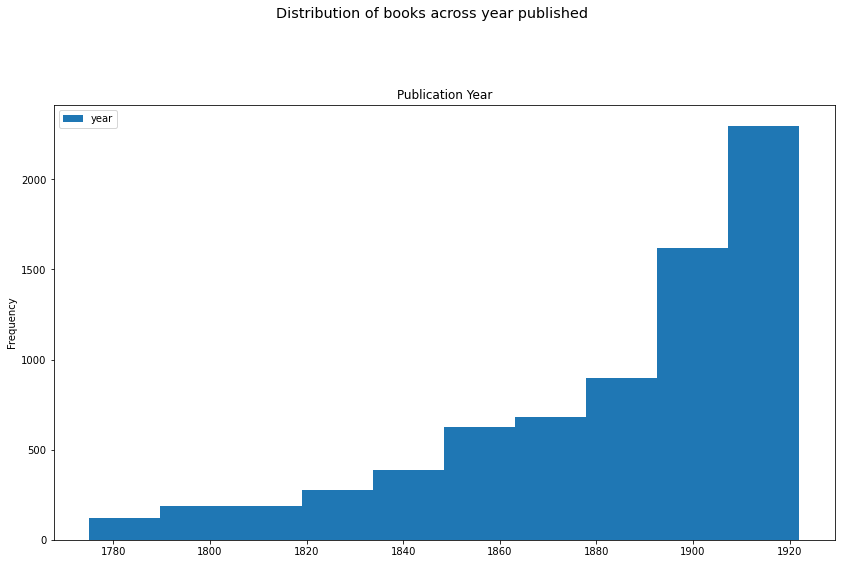

In [77]:
import matplotlib.pyplot as plt
# uncomment this statement to see the count for each year
# print(dfFull['year'].value_counts(ascending=True).sort_index())
print(f'Between 1775-1850 books: {round(len(dfFull.loc[dfFull.year<1875])/len(dfFull)*100)}%')
print(f'Between 1850-1900 books:{round(len(dfFull.loc[(dfFull.year>=1875) & (dfFull.year < 1900)])/len(dfFull)*100)}%')
print(f'Between 1900-1922 books: {round(len(dfFull.loc[(dfFull.year>=1900)& (dfFull.year <= 1922)])/len(dfFull)*100)}%')

dfFull.plot(kind='hist', title='Publication Year')
plt.suptitle('Distribution of books across year published', x=0.5, y=1.05, ha='center', fontsize='x-large')

In [78]:
"""
Define testing and training books
"""
# testing books are every 5th book for each year according to the original dataset
# or if there are fewer than 5 books, the first book. 
testing_books = []
did_it = []
for year in range(1775, 1923):
    books_from_year = list(dfFull[dfFull.year == year].index)
    if len(books_from_year) < 5:
        testing_books.append(books_from_year[0])
    testing_books.extend(books_from_year[::5]) # we want 20% testing dat

def get_is_testing(row):
    if row.name in testing_books:
        did_it.append(row.name)
        row['test'] = True
    else:
        row['test'] = False
    return row
        
dfFull = dfFull.apply(get_is_testing, axis=1)


To have a more even distribution of the dataset, as well as to have more manageable data points that the text of an entire book, I create 200 data points for each year represented in the set. The 200 points are 5000 character portions of the books attributed to that year. For years with only a few books, the points from that year will have less variety, perhaps yielding worse results than the years with a variety of different books. I do this before tokenizing and other processing the text as the process will be less intense once the texts have been truncated.

In [79]:
"""
Create new dataframe for final data. Each year will have 200 rows, each with a unique portion of text sourced
from a book published in that year
"""

all_years = []
PER_YEAR_COUNT = 200

for year in range(1775, 1923):
    years = [year]*PER_YEAR_COUNT
    all_years.extend(years)

print(len(all_years))
dfPas = pd.DataFrame(columns = ['title', 'passage', 'year', 'test'])
dfPas['year'] = all_years
dfPas['index'] = dfPas.index


pd.concat([dfPas.head(2), dfPas.tail(2)])

29600


,title,passage,year,test,index
0,NaN,NaN,1775,NaN,0
1,NaN,NaN,1775,NaN,1
29598,NaN,NaN,1922,NaN,29598
29599,NaN,NaN,1922,NaN,29599


In [80]:
import random
import copy
PASSAGE_LENGTH = 5000

dfFullCopy = dfFull.copy()
no_continue_list = []

def get_full_text(row):
    index = row['index']
    index_for_year = index % PER_YEAR_COUNT

    books_from_year = list(dfFullCopy[dfFullCopy.year == row['year']].index)

    # we have exhausted all the text from the books from this year. There are a few "bad" years with only 4 books
    if not len(books_from_year):
        print(f'THERE ARE NO BOOKS LEFT FOR {row.year}. NOT CONTINUING WITH THIS YEAR.')
        raise ValueError('Depleted books')
    
    index_in_book_list = index_for_year % len(books_from_year)
    book_index = books_from_year[index_in_book_list]
    
    book = dfFullCopy.loc[book_index]
    is_test = book['test']
    full_text = copy.copy(book['text'])

    return (full_text, book_index, book['title'], is_test)

def get_passage(row):
    if row['year'] in no_continue_list:
        return
    
    try:
        full_text, book_index, book_title, is_test = get_full_text(row)
    except ValueError:
        no_continue_list.append(row['year'])
        return
    
    # # testing books are every 5th book for each year according to the original dataset
    # # or if there are fewer than 5 books, the first book. 
    # books_from_year_original = list(dfFull[dfFull.year == row['year']].index)
    # testing_books = books_from_year_original[::5]
    # row['test'] = book_index == 0 if len(books_from_year_original) < 5 else book_index in testing_books 
    
    # print(f'Creating excerpt for {row.year}: from {book_title}.')
    
    max_start_point = len(full_text) - PASSAGE_LENGTH
    start_point = random.randint(0, max_start_point)
    end_point = start_point+PASSAGE_LENGTH
    passage = full_text[start_point:end_point]
    
    if not len(passage) == PASSAGE_LENGTH:
        print(f'SOMETHING WENT WRONG FOR BOOK {book_title}')
        return
        
    # Remove the used text from the original dataframe if remaining text is less than the passage length, remove the book
    # Otherwise remove the used text from the existing full text and replace the modified text in the original df
    full_text_modified = full_text[:start_point] + full_text[end_point:]
    if len(full_text_modified) < PASSAGE_LENGTH:
        print(f'dropping book: {book_title} at index {book_index} from year {row.year}')
        dfFullCopy.drop([book_index], inplace=True)
    else:
        dfFullCopy.at[book_index,'text'] = full_text_modified
        new_text_length = len(dfFullCopy.loc[book_index]['text'])
    
        if not new_text_length < len(full_text):
            print(f'SOMETHING WENT WRONG FOR BOOK {book_title}')
            return
        
    row['passage'] = passage  
    row['title'] = book_title
    row['test'] = is_test
    # print(f'Success! {len(row.passage)} char passage created for {book_title}.')

    return row


dfPas = dfPas.apply(get_passage, axis=1)
pd.concat([dfPas.head(2), dfPas.tail(2)])

dropping book: st patricks day at index 10381 from year 1775
dropping book: the duenna at index 10433 from year 1775
dropping book: the passenger at index 7669 from year 1776
dropping book: le nouveau dictionnaire at index 5891 from year 1776
dropping book: prisoners of the revolution at index 9467 from year 1776
dropping book: faithfully yours at index 5408 from year 1777
dropping book: dominica at index 5675 from year 1777
dropping book: aslaugas knight at index 6720 from year 1777
dropping book: proeve van kleine gedigten at index 2602 from year 1778
dropping book: percy at index 7675 from year 1778
dropping book: logbook of timothy boardman at index 5929 from year 1778
dropping book: edouard at index 6189 from year 1778
dropping book: die argonauten at index 8997 from year 1779
dropping book: thankful blossom at index 4368 from year 1779
dropping book: paul jones at index 6877 from year 1779
dropping book: die erziehung des at index 9361 from year 1780
dropping book: the metaphysic

,title,passage,year,test,index
0,thomas jefferson,"the object of his remonstrance and reprobation. From 1760, the colonies, the rights of the colonies, the liberties of the colonies, and the wrongs inflicted on the colonies, had engaged his constant attention; and it has surprised those who have had the opportunity of observing, with what full remembrance and with what prompt recollection he could refer, in his extreme old age, to every act of parliament affecting the colonies, distinguishing and stating their respective titles, sections, and provisions; and to all the colonial memorials, remonstrances and petitions with whatever else belonged to the intimate and exact history of the times from that year to 1775. It was, in his own judgment, between these years that the American people came to a full understanding and thorough knowledge of their rights, and to a fixed resolution of maintaining them; and bearing, himself, an active part in all important transactions, the controversy with England being then in effect the business of his life, facts, dates and particulars, made an impression which was never effaced. He was prepared, therefore, by education and discipline, as well as by natural talent and natural temperament, for the part which he was now to act. The eloquence of Mr. Adams resembled his general character, and formed, indeed, a part of it. It was bold, manly, and energetic, and such the crisis required. When public bodies are to be addressed on momentous occasions, when great interests are at stake, and stron...",1775.0,True,0.0
1,charles lamb,"tory is."" On Manning quitting England for China (1806), the letters become less frequent; they continue, however, during his absence: one of them, surpassing the Elia essay, to ""Distant Correspondents,"" is very remarkable; and when the Chinese traveller returned to London, he was very often a guest at Lamb's residence. I have repeatedly met him there. His countenance was that of an intelligent, steady, almost serious man. His journey to the Celestial Empire had not been unfruitful of good; his talk at all times being full of curious information, including much anecdote, and some (not common) speculations on men and things. When he returned, he brought with him a native of China, whom he took one evening to a ball in London, where the foreigner from Shanghai, or Pekin, inquired with much naivete as to the amount of money which his host had given to the dancers for their evening's performance, and was persuaded with difficulty that their exertions were entirely gratuitous. Manning had a curious habit of bringing with him (in his waistcoat pocket) some pods of the red pepper, whenever he expected to partake of a meal. His original intention (as I understood) when he set out for China, was to frame and publish a Chinese and English dictionary; yet--although he brought over much material for the purpose--his purpose was never carried into effect. Lamb had great love and admiration for him. In a letter to Coleridge, in after years (1826), he says, ""I am glad you esteem Mannin...",1775.0,False,1.0
29598,making the house a home,"""Hello, Daddy!"" from one of the sweetest little faces I have ever seen. And from that day, until God needed her more and called her home, that ""Hello, Daddy"" greeted me and made every care worth while. The little home had begun to grow in beauty once more. That first shopping tour for Marjorie stands out as an epoch in our lives. I am not of the right sex to describe it. Marjorie came to us with only such clothing as a poor mother could provide. She must be outfitted anew from head to toe, and she was. The next evening, when she greeted me, she was the proud possessor of more lovely things than she had ever known before. But, beautiful as the little face appeared to me then, more beautiful was the look in Mother's face. There had come into her eyes a look of happiness which had been absent for many months. I learned then, and I state it now as a posi

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

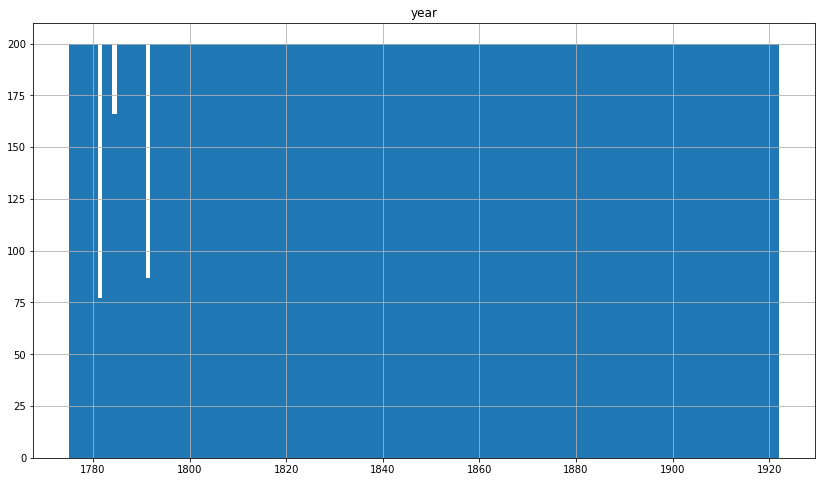

In [81]:
# histogram of datapoint distribution across years
dfPas.hist(column="year", bins=148)

In [82]:
"""
Delete rows without passages (from depleted years)
"""
print('Count before removal ',dfPas.shape[0])
dfPas = dfPas.drop(dfPas[dfPas.passage.apply(is_acceptable_length, length=(5000)) == False].index)
print('Count after removal ', dfPas.shape[0])


Count before removal  29600
Count after removal  29330


In [83]:
dfGrouped = dfPas.groupby(['test'])['test'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

print(dfGrouped.head())


    test  Count
0  False  22775
1   True   6555


In [84]:
from sklearn.utils import shuffle

dfPas = dfPas.copy()
dfPas = dfPas.drop(columns=['index'])
dfPas = shuffle(dfPas, random_state=1)
dfPas = dfPas.reset_index(drop=True)
dfPas.head()

,title,passage,year,test
0,the europeans,"to Acton that there was a spark of irritation in her eye--a note of irony (as when she spoke of Lizzie being never away from her mother) in her voice. If Madame Munster was irritated, Robert Acton was vaguely mystified; she began to move about the room again, and he looked at her without saying anything. Presently she took out her watch, and, glancing at it, declared that it was three o'clock in the morning and that he must go. ""I have not been here an hour,"" he said, ""and they are still sitting up at the other house. You can see the lights. Your brother has not come in."" ""Oh, at the other house,"" cried Eugenia, ""they are terrible people! I don't know what they may do over there. I am a quiet little humdrum woman; I have rigid rules and I keep them. One of them is not to have visitors in the small hours--especially clever men like you. So good night!"" Decidedly, the Baroness was incisive; and though Acton bade her good night and departed, he was still a good deal mystified. The next day Clifford Wentworth came to see Lizzie, and Acton, who was at home and saw him pass through the garden, took note of the circumstance. He had a natural desire to make it tally with Madame M; auunster's account of Clifford's disaffection; but his ingenuity, finding itself unequal to the task, resolved at last to ask help of the young man's candor. He waited till he saw him going away, and then he went out and overtook him in the grounds. ""I wish very much you would answer me a question,...",1878.0,False
1,afghanistan and the anglorussian dispute,"=================================================== [Footnote 2: Cashmere 27,000, Nepaul 100,000, Hyderabad 44,000.] [Footnote 3: Sappers and Miners.] For purposes of administration, instruction, and mobilization, Great Britain and Ireland are partitioned into thirteen military districts commanded by general officers. These are sub-divided as follows: for the infantry one hundred and two sub-districts under regimental commanders; for the artillery there are twelve sub-districts, and for the cavalry two districts. The brigade of an infantry sub-district comprises usually two line battalions, two militia battalions, the brigade depot, rifle volunteer corps, and infantry of the army reserve. Of the line battalions one is generally at home and one abroad. In an artillery sub-district are comprised a proportion of the royal artillery and artillery of the militia, volunteers, and army reserve respectively. In like manner a cavalry sub-district includes the yeomanry and army reserve cavalry. The officers on duty in the Adjutant-General's and Quartermaster's departments of the British army are, as a rule, detailed for a term of five years from the Line, but must rejoin their regiments immediately upon orders for foreign service. The Royal Engineers then were and are organized into forty-three companies. The cavalry is divided into the Household Cavalry and Cavalry of the Line. The first named comprises the 1st and 2d Life Guards and Royal Horse Guards,--three regiments....",1838.0,False
2,the piccolomini,"largely, places Mr. Coleridge in the very first rank of poetical translators. He is, perhaps, the solitary example of a man of very great original genius submitting to all the labors, and reaping all the honors of this species of literary exertion.""--Blackwood, 1823. PREFACE. The two dramas,--PICCOLOMINI, or the first part of WALLENSTEIN, and the DEATH OF WALLENSTEIN, are introduced in the original manuscript by a prelude in one act, entitled WALLENSTEIN'S CAMP. This is written in rhyme, and in nine-syllable verse, in the same lilting metre (if that expression may be permitted), with the second Eclogue of Spenser's Shepherd's Calendar. This prelude possesses a sort of broad humor, and is not deficient in character: but to have translated it into prose, or into any other metre than that of the original, would have given a false idea both of its style and purpor

In [85]:


dfTest = dfPas[dfPas['test']==True].drop(columns=['test']).reset_index(drop=True)
dfTrain = dfPas[dfPas['test']==False].drop(columns=['test']).reset_index(drop=True)
print('Training count: ', dfTrain.shape[0])
print('Testing count: ', dfTest.shape[0])

test_books = set(dfTest['title'].values.tolist())
train_books = set(dfTrain['title'].values.tolist())
books_in_common = [book for book in test_books if book in train_books]

print('Number of books in commong between the sets: ', len(books_in_common))

# dfTest.to_csv('testing.csv', index=False)
# dfTrain.to_csv('training.csv', index=False)

print(dfTest.head(2))


Training count:  22775
Testing count:  6555
Number of books in commong between the sets:  0
                      title  \
0  on the origin of species   
1                  ferragus   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

All of the years are evenly distributed, except for three years that had very sparse data - less than four books each. 1781 only has 77 instances, 1791 only 87 instances, and 1784 has 166. This may yield less exact results for these years. In general, pre-1825 results will be worse than post-1825 as the amount of books available is relatively low for these years, meaning that there is less variety of examples of each year's text.

We have manually separate the training and testing data in the methods above rather than using a library. This is because we do not want to train the model to fit a specific book, but rather a specific year, therefor we must ensure that each book is either exclusively in the testing set or in the training set. The split comes to roughly 27% testing and 63% training

In [86]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

MAX_WORDS = 10000

x_test = dfTest['passage']
y_test = dfTest['year']

x_train = dfTrain['passage']
y_train = dfTrain['year']

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)


In [87]:
import numpy as np

MAX_LENGTH = 700

vocab_size = len(tokenizer.word_index)
print(vocab_size)
x_train = pad_sequences(x_train, padding='post', maxlen=MAX_LENGTH)
x_test = pad_sequences(x_test, padding='post', maxlen=MAX_LENGTH)

embeddings_dictionary = dict()
glove_file = open('glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    values = line.split()
    word = values[0]
    vector_dimensions = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()
print(f'Found {len(embeddings_dictionary)} word vectors')

415530
Found 400001 word vectors


In [88]:
EMBEDDING_DIMENSION = 100
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index-1] = embedding_vector

In [89]:
"""
Try as regression
"""
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIMENSION, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_data=(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 700, 100)          41553000  
                                                                 
 flatten_5 (Flatten)         (None, 70000)             0         
                                                                 
 dense_15 (Dense)            (None, 512)               35840512  
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 77,525,097
Trainable params: 35,972,097
Non-trainable params: 41,553,000
_________________________________________________________________
Epoch 1/10
178/178 [=============

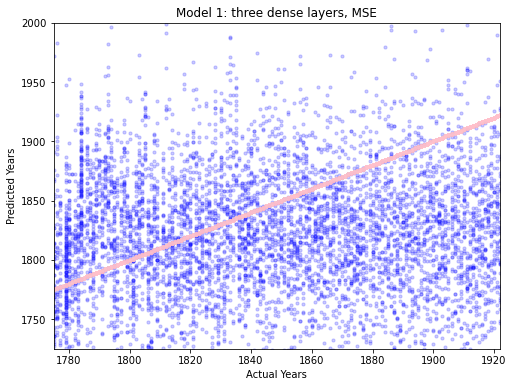

In [108]:
import matplotlib.pyplot as plt
import numpy as np

def get_predictions(current_model, test_x):
    test_array = np.array(test_x)
    return current_model.predict(test_array)

def create_scatterplot(test_x, test_y, current_model, title, category=False):
    predictions =  get_predictions(current_model, test_x)
    plt.rcParams["figure.figsize"] = [8,6]
    plt.axis([1775, 1922, 1725, 2000])
    plt.scatter(x = test_y, y = predictions, color='blue', alpha=0.2, s=10)
    plt.scatter(x = test_y, y=test_y, color='pink', alpha=0.2, s=10)
    plt.title(title)
    plt.xlabel("Actual Years")
    plt.ylabel("Predicted Years")
    plt.show()

create_scatterplot(x_test, y_test, model, "Model 1: three dense layers, MSE")

In [102]:
from sklearn import metrics

def get_MSE_and_MAE (current_model, test_x):
    predictions =  get_predictions(current_model, test_x)
    print('Mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('Mean absolute error: ', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))
    
get_MSE_and_MAE(model, x_test)

Mean squared error:  78.81507246652913
Mean absolute error:  7.825916128744013


205/205 [==============================] - 5s 24ms/step - loss: 6211.8135
Test Score: 6211.8134765625


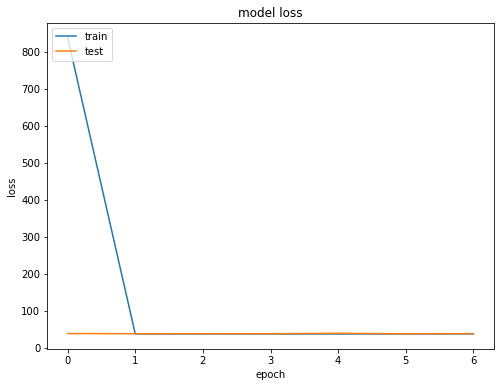

In [106]:
import matplotlib.pyplot as plt

def plot_loss(score):
    print("Test Score:", score)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()
    
plot_loss(model.evaluate(x_test, y_test, verbose=1))

In [97]:
"""
Try same params but with mean absolute error loss function
"""
model2 = Sequential()
model2.add(Embedding(vocab_size, EMBEDDING_DIMENSION, input_length=MAX_LENGTH))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1))
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False
model2.summary()

model2.compile(optimizer=Adam(learning_rate=0.1), loss='mean_absolute_error')

history = model2.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_data=(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 700, 100)          41553000  
                                                                 
 flatten_6 (Flatten)         (None, 70000)             0         
                                                                 
 dense_18 (Dense)            (None, 512)               35840512  
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 1)                 257       
                                                                 
Total params: 77,525,097
Trainable params: 35,972,097
Non-trainable params: 41,553,000
_________________________________________________________________
Epoch 1/10
178/178 [=============

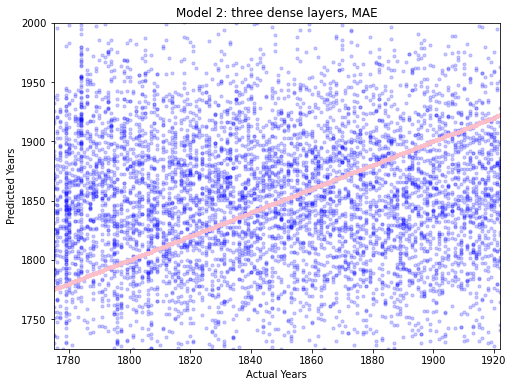

In [130]:
create_scatterplot(x_test, y_test, model2, "Model 2: three dense layers, MAE")

In [103]:
get_MSE_and_MAE(model2, x_test)

Mean squared error:  73.50422415554384
Mean absolute error:  7.620125635573291


In [122]:
from keras.layers import SimpleRNN

"""
Using SIMPLE RNN
"""
model3 = Sequential()
model3.add(Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=MAX_LENGTH))
model3.add(SimpleRNN(units=32))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation="relu")) 
model3.add(Dense(1))
model3.layers[0].trainable = False
model3.summary()
model3.compile(loss='mean_absolute_error', optimizer='adam')

history = model3.fit(x_train, y_train,
epochs=12,
batch_size=64,
validation_data=(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 700, 100)          41553000  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_24 (Dense)            (None, 512)               16896     
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 1)                 257       
                                                                 
Total params: 41,705,737
Trainable params: 152,737
Non-trainable params: 41,553,000
_________________________________________________________________
Epoch 1/12
356/356 [================

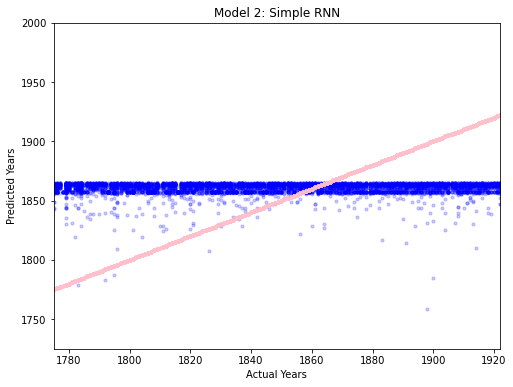

In [123]:
create_scatterplot(x_test, y_test, model3, "Model 2: Simple RNN")

In [124]:
get_MSE_and_MAE(model3, x_test)

Mean squared error:  45.86673616720356
Mean absolute error:  6.259506012182008


205/205 [==============================] - 3s 14ms/step - loss: 39.1814
Test Score: 39.18141555786133


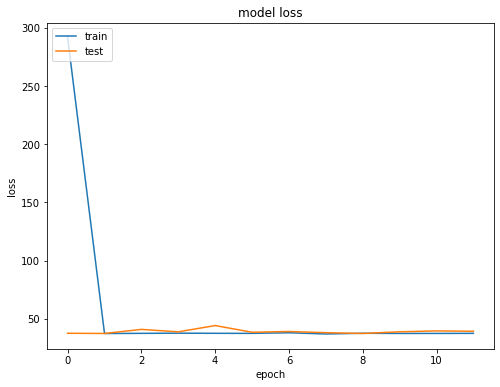

In [125]:
plot_loss(model3.evaluate(x_test, y_test, verbose=1))

In [142]:
from keras.layers import LSTM

"""
Using LSTM - (reads from both sides)
"""
model4 = Sequential()
model4.add(Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=MAX_LENGTH))
model4.add(LSTM(units=32))
model4.add(Dense(512, activation="relu")) 
model4.add(Dense(256, activation="relu")) 
model4.add(Dense(128, activation="relu")) 
model4.add(Dense(1))
model4.layers[0].trainable = False
model4.summary()
model4.compile(loss='mean_absolute_error', optimizer='adam')

history = model4.fit(x_train, y_train,
epochs=10,
batch_size=256,
validation_data=(x_test, y_test))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 700, 100)          41553000  
                                                                 
 lstm_4 (LSTM)               (None, 32)                17024     
                                                                 
 dense_43 (Dense)            (None, 512)               16896     
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 1)                 129       
                                                                 
Total params: 41,751,273
Trainable params: 198,273
No

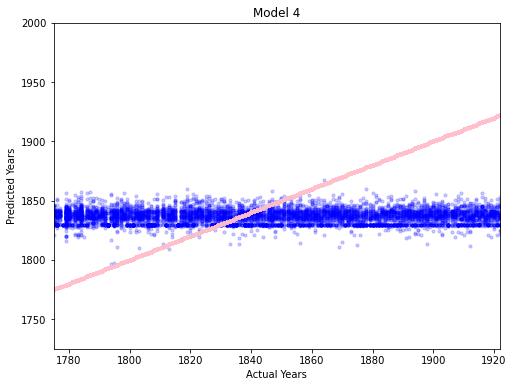

In [143]:
create_scatterplot(x_test, y_test, model4, "Model 4")

In [393]:
"""
Separate into eras
"""
def write_era(row):
    if row['year'] < 1820:
        row['era'] = 1
    elif row['year'] >= 1820 and row['year'] < 1870:
        row['era'] = 2
    elif row['year'] >= 1870:
        row['era'] = 3
    return row

dfTest2 = dfTest.copy()
dfTrain2 = dfTrain.copy()
dfTest2 = dfTest2.apply(write_era, axis=1)
dfTrain2 = dfTrain2.apply(write_era, axis=1)

dfTest2.head(2)

,title,passage,year,era
0,on the origin of species,"hypothesis; or rather I ought to say we shall have proved it as far as certainty is possible for us; for, after all, there is no one of our surest convictions which may not be upset, or at any rate modified by a further accession of knowledge. It was because it satisfied these conditions that we accepted the hypothesis as to the disappearance of the tea-pot and spoons in the case I supposed in a previous lecture; we found that our hypothesis on that subject was tenable and valid, because the supposed cause existed in nature, because it was competent to account for the phenomena, and because no other known cause was competent to account for them; and it is upon similar grounds that any hypothesis you choose to name is accepted in science as tenable and valid. What is Mr. Darwin's hypothesis? As I apprehend it--for I have put it into a shape more convenient for common purposes than I could find 'verbatim' in his book--as I apprehend it, I say, it is, that all the phenomena of organic nature, past and present, result from, or are caused by, the inter-action of those properties of organic matter, which we have called ATAVISM and VARIABILITY, with the CONDITIONS OF EXISTENCE; or, in other words,--given the existence of organic matter, its tendency to transmit its properties, and its tendency occasionally to vary; and, lastly, given the conditions of existence by which organic matter is surrounded--that these put together are the causes of the Present and of the Past condition...",1831.0,2
1,ferragus,"in all things beside his wife, even in her caprices; in fact, he would have been uneasy if she had none, thinking it a symptom of some illness. Auguste de Maulincour had the personal misfortune of running against this passion, and falling in love with the wife beyond recovery. Nevertheless, though he carried in his heart so intense a love, he was not ridiculous; he complied with all the demands of society, and of military manners and customs. And yet his face wore constantly, even though he might be drinking a glass of champagne, that dreamy look, that air of silently despising life, that nebulous expression which belongs, though for other reasons, to _blases_ men,--men dissatisfied with hollow lives. To love without hope, to be disgusted with life, constitute, in these days, a social position. The enterprise of winning the heart of a sovereign might give, perhaps, more hope than a love rashly conceived for a happy woman. Therefore Maulincour had sufficient reason to be grave and gloomy. A queen has the vanity of her power; the height of her elevation protects her. But a pious _bourgeoise_ is like a hedgehog, or an oyster, in its rough wrappings. At this moment the young officer was beside his unconscious mistress, who certainly was unaware that she was doubly faithless. Madame Jules was seated, in a naive attitude, like the least artful woman in existence, soft and gentle, full of a majestic serenity. What an abyss is human nature! Before beginning a conversation, the ...",1820.0,2


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'era'}>]], dtype=object)

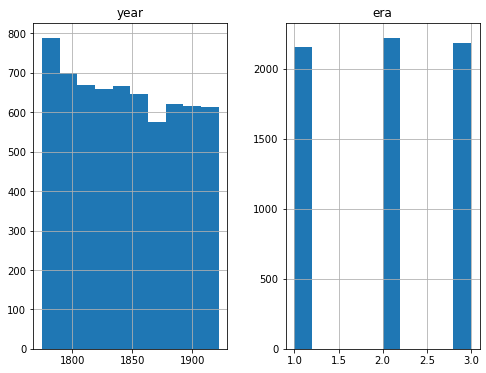

In [394]:
dfTest2.hist()

In [395]:
x_test_era = dfTest2['passage']
y_test_era = dfTest2['era']

x_train_era = dfTrain2['passage']
y_train_era = dfTrain2['era']

label_encoder = preprocessing.LabelEncoder()
y_test_era = label_encoder.fit_transform(y_test_era)
y_train_era = label_encoder.fit_transform(y_train_era)

y_train_era = to_categorical(y_train_era)
y_test_era = to_categorical(y_test_era)

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train_era)

x_train_era = tokenizer.texts_to_sequences(x_train_era)
x_test_era = tokenizer.texts_to_sequences(x_test_era)



In [396]:
import numpy as np

vocab_size = len(tokenizer.word_index)

x_train_era = pad_sequences(x_train_era, padding='post', maxlen=MAX_LENGTH)
x_test_era = pad_sequences(x_test_era, padding='post', maxlen=MAX_LENGTH)

embeddings_dictionary = dict()
glove_file = open('glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    values = line.split()
    word = values[0]
    vector_dimensions = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()
print(f'Found {len(embeddings_dictionary)} word vectors')

Found 400001 word vectors


In [397]:
EMBEDDING_DIMENSION = 100
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index-1] = embedding_vector

In [398]:
model5 = Sequential()
model5.add(Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=MAX_LENGTH))
model5.add(LSTM(256, return_sequences=True))
model5.add(LSTM(128, return_sequences=True))
model5.add(LSTM(32))
model5.add(Dense(3, activation='softmax'))
model5.layers[0].trainable = False
model5.summary()

model5.compile(optimizer=Adam(learning_rate=0.01), metrics=['acc'], loss='categorical_crossentropy')

history = model2.fit(x_train_era, y_train_era, batch_size=128, epochs=10, verbose=1, validation_data=(x_test_era, y_test_era))


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_62 (Embedding)    (None, 50, 100)           41553000  
                                                                 
 lstm_70 (LSTM)              (None, 50, 256)           365568    
                                                                 
 lstm_71 (LSTM)              (None, 50, 128)           197120    
                                                                 
 lstm_72 (LSTM)              (None, 32)                20608     
                                                                 
 dense_115 (Dense)           (None, 3)                 99        
                                                                 
Total params: 42,136,395
Trainable params: 583,395
Non-trainable params: 41,553,000
_________________________________________________________________
Epoch 1/10
178/178 [===============

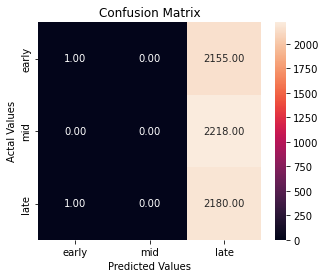

In [399]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def create_confusion_matrix(current_model):
    y_prediction = current_model.predict(x_test_era)
    rounded_y=np.argmax(y_test_era, axis=1)
    rounded_predictions=np.argmax(y_prediction, axis=1)

    # Create the confusion matrix 
    confusion_matrix = metrics.confusion_matrix(rounded_y, rounded_predictions)
    cm_df = pd.DataFrame(confusion_matrix,
                         index = ['early','mid','late'], 
                         columns = ['early','mid','late'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df,fmt='.2f', annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()


create_confusion_matrix(model5)

In [400]:
model6 = Sequential()
model6.add(Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=MAX_LENGTH))
model6.add(LSTM(32))
model6.add(Dense(3, activation='softmax'))
model6.add(Flatten())
model6.layers[0].trainable = False
model6.summary()

model6.compile(optimizer=Adam(learning_rate=0.01), metrics=['acc'], loss='categorical_crossentropy')

history = model.fit(x_train_era, y_train_era, batch_size=32, epochs=10, verbose=1, validation_data=(x_test_era, y_test_era))


Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_63 (Embedding)    (None, 50, 100)           41553000  
                                                                 
 lstm_73 (LSTM)              (None, 32)                17024     
                                                                 
 dense_116 (Dense)           (None, 3)                 99        
                                                                 
 flatten_38 (Flatten)        (None, 3)                 0         
                                                                 
Total params: 41,570,123
Trainable params: 17,123
Non-trainable params: 41,553,000
_________________________________________________________________
Epoch 1/10
712/712 [==============================] - 37s 52ms/step - loss: 1.1475 - acc: 0.3514 - val_loss: 1.1515 - val_acc: 0.3312
Epoch 2/10
712/712 [==============

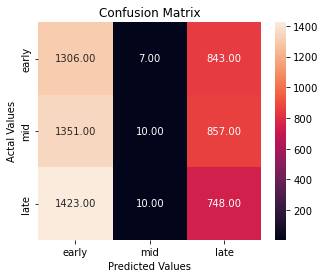

In [401]:
create_confusion_matrix(model6)

In [402]:
model7 = Sequential()
model7.add(Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=MAX_LENGTH))
model7.add(LSTM(256))
model7.add(Dense(3, activation='softmax'))
model7.add(Flatten())
model7.layers[0].trainable = False
model7.summary()

model7.compile(optimizer=Adam(learning_rate=0.01), metrics=['acc'], loss='categorical_crossentropy')

history = model.fit(x_train_era, y_train_era, batch_size=256, epochs=10, verbose=1, validation_data=(x_test_era, y_test_era))


Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_64 (Embedding)    (None, 50, 100)           41553000  
                                                                 
 lstm_74 (LSTM)              (None, 256)               365568    
                                                                 
 dense_117 (Dense)           (None, 3)                 771       
                                                                 
 flatten_39 (Flatten)        (None, 3)                 0         
                                                                 
Total params: 41,919,339
Trainable params: 366,339
Non-trainable params: 41,553,000
_________________________________________________________________
Epoch 1/10
89/89 [==============================] - 15s 164ms/step - loss: 1.1063 - acc: 0.3581 - val_loss: 1.1200 - val_acc: 0.3339
Epoch 2/10
89/89 [================

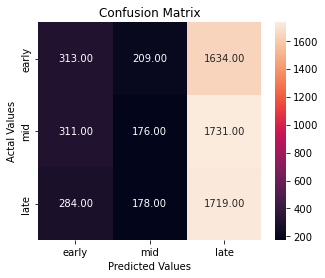

In [403]:
create_confusion_matrix(model)